In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

# Data 

In [2]:
FolderNames = ["BoulangeriePatisserie", "GlacesSorbets", "Fromage", "Electricite"]

df = pd.read_csv(
   "./{}/valeurs_mensuelles.csv".format(FolderNames[0]),
    sep=";",
    skiprows=[1, 2],
    index_col="Libellé",
    parse_dates=["Libellé"])
df.columns = [FolderNames[0],"ToDelete"]
del(df["ToDelete"])


for i,name in enumerate(FolderNames):
    if i>0:
        temp = pd.read_csv(
       "./{}/valeurs_mensuelles.csv".format(name),
        sep=";",
        skiprows=[1, 2],
        index_col="Libellé",
        parse_dates=["Libellé"])
        temp.columns = [FolderNames[i],"ToDelete"]
        del(temp["ToDelete"])
        df = pd.merge(df, temp, on='Libellé')
    
df.head()


,BoulangeriePatisserie,GlacesSorbets,Fromage,Electricite
Libellé,,,,
2019-01-01,104.01,87.15,98.24,123.15
2018-12-01,95.64,37.26,95.97,117.34
2018-11-01,102.27,59.06,97.25,101.31
2018-10-01,111.41,65.15,98.34,91.73
2018-09-01,99.68,77.15,90.37,84.16


# Plots

In [3]:
"""print(sum(dfBP.Date == dfGS.Date))
print(sum(dfGS.Date == dfE.Date))
print(sum(dfE.Date == dfF.Date))
#Les indices de dates sont les mêmes, on peut donc merger les 4 séries sur les dates"""

'print(sum(dfBP.Date == dfGS.Date))\nprint(sum(dfGS.Date == dfE.Date))\nprint(sum(dfE.Date == dfF.Date))\n#Les indices de dates sont les m\xc3\xaames, on peut donc merger les 4 s\xc3\xa9ries sur les dates'

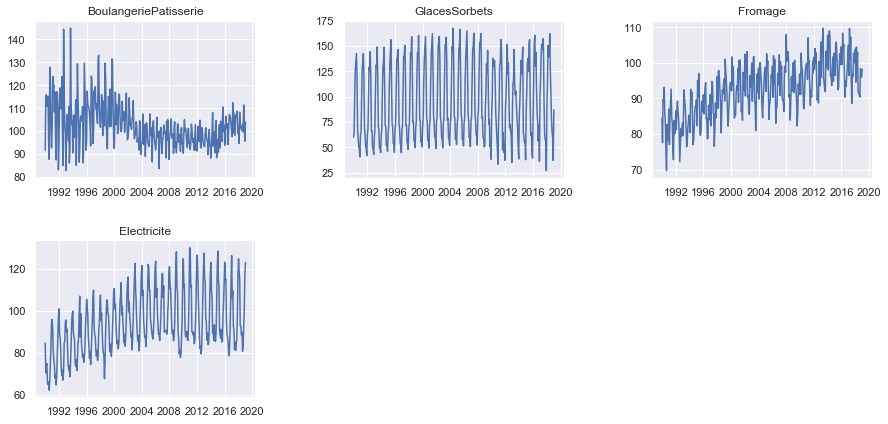

In [4]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,name in enumerate(FolderNames):
    
    X = df.iloc[:,i].dropna()
    ax = fig.add_subplot(4, 3, i+1)
    ax.plot(X)
    ax.set(title=name)

- Boulangerie Patisserie : stationnaire ? Pue du cul
- GlaceSorbets : saisonalité (pic été), pas de tendance déterminisite
- Fromage : tendance, saisonalité ? 
- Electricité : tendance (de plus en plus de technologies gourmandes en énergie) + saisonalité (pic hiver)

# Fonctions d'autocorrélogrammes 

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

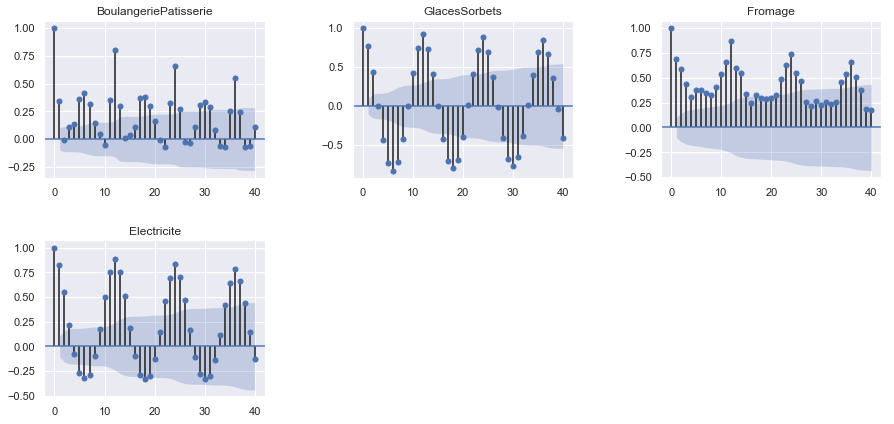

In [6]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,name in enumerate(FolderNames):
    
    ax1 = fig.add_subplot(4,3,i+1)
    fig = plot_acf(df.iloc[:,i].dropna(how="any").values, lags=40, title=name, ax=ax1)

- Boulangerie Patisserie : saisonalité
- GlaceSorbets : saisonalité (pic été), pas de tendance déterminisite
- Fromage : tendance, saisonalité ? 
- Electricité : tendance (de plus en plus de technologies gourmandes en énergie) + saisonalité (pic hiver)

# Electricité

In [7]:
dfE = pd.Series(df.Electricite)

[Text(0.5,1,"Production mensuelle d'\xc3\xa9lectricit\xc3\xa9")]

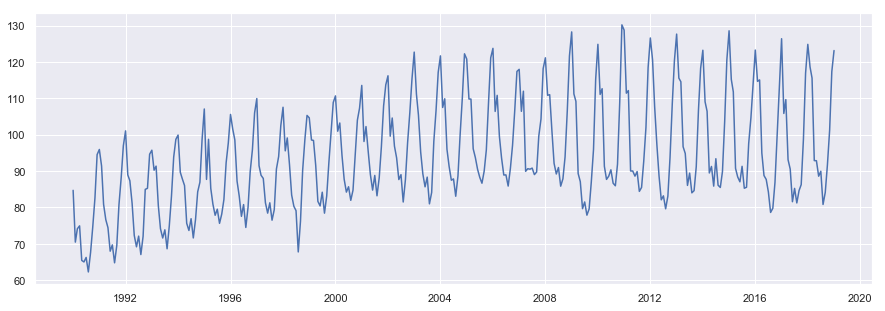

In [8]:
plt.figure(figsize=(15,5))
plt.plot(dfE)
ax.set(title="Production mensuelle d'électricité")

In [9]:
#plusieurs pics étranges : aout 1998, aout 2009, aout 2012 et aout 2016
dfE[(dfE.index > '1996-01-01') & (dfE.index < '2000-01-01')].sort_values()[0:1]

Libellé
1998-08-01    67.78
Name: Electricite, dtype: float64

## Transformation logarithmique

[Text(0.5,1,"Production mensuelle d'\xc3\xa9lectricit\xc3\xa9")]

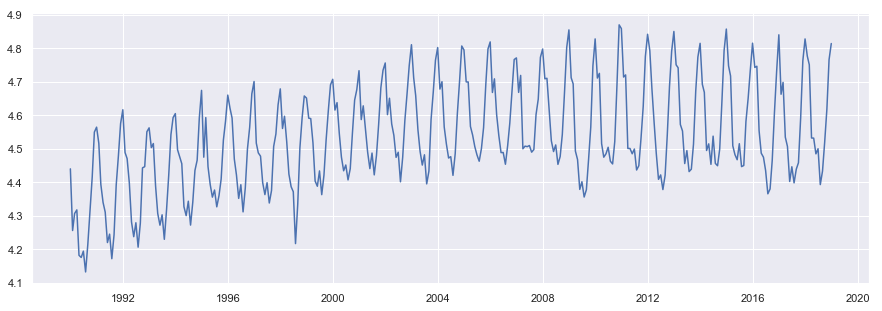

In [10]:
plt.figure(figsize=(15,5))
plt.plot(np.log(dfE))
ax.set(title="Production mensuelle d'électricité")

## Décomposition Trend / Saisonalité / Bruit

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

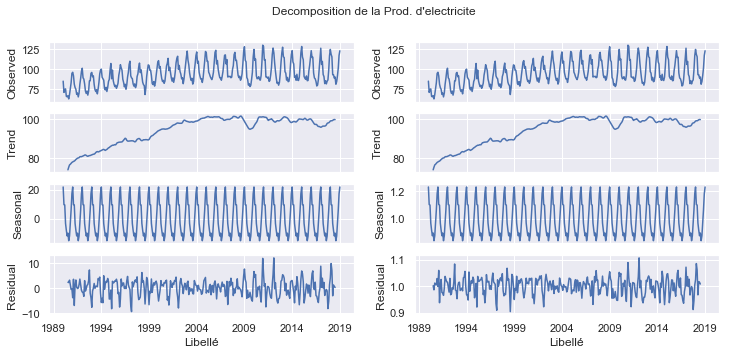

In [12]:
result_add = seasonal_decompose(dfE, model='additive')
result_mult = seasonal_decompose(dfE, model='multiplicative')

def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(12,5))

plotseasonal(result_add, axes[:,0])
plotseasonal(result_mult, axes[:,1])
plt.suptitle("Decomposition de la Prod. d'electricite")
plt.show()


## ACF

<Figure size 720x720 with 0 Axes>

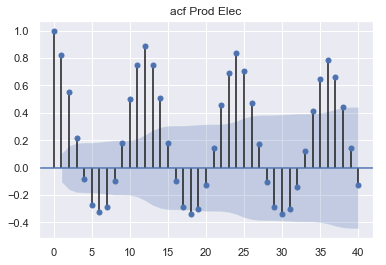

In [13]:
plt.figure(figsize=(10,10))
plot_acf(dfE.values, lags=40, title="acf Prod Elec")
plt.show()

On observe une saisonalité de 12 mois

## PACF

<Figure size 720x720 with 0 Axes>

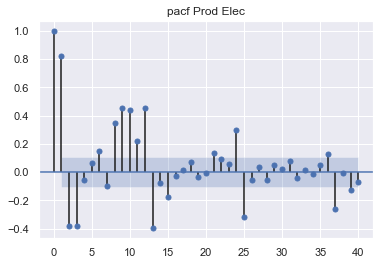

In [14]:
plt.figure(figsize=(10,10))
plot_pacf(dfE.values, lags=40, title="pacf Prod Elec")
plt.show()

## Désaisonnalisation 

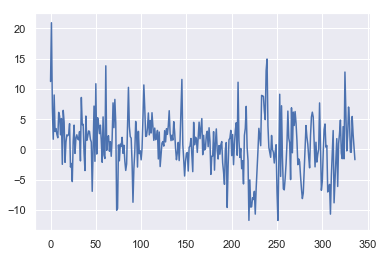

In [15]:
series = pd.Series(dfE) 
X = series.values[::-1]
diff = list()
for i in range(12, len(X)):
    value = X[i] - X[i - 12]
    diff.append(value)
plt.plot(diff)
plt.show()


### ACF aprés désaisonnalisation 

<Figure size 720x720 with 0 Axes>

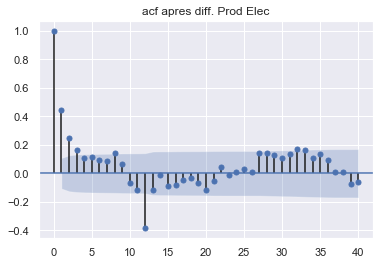

In [16]:
plt.figure(figsize=(10,10))
plot_acf(diff, lags=40, title="acf apres diff. Prod Elec")
plt.show()

### PACF aprés désaisonnalisation 

<Figure size 720x720 with 0 Axes>

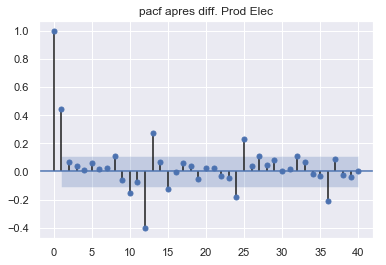

In [17]:
plt.figure(figsize=(10,10))
plot_pacf(diff, lags=40, title="pacf apres diff. Prod Elec")
plt.show()

## Suppression tendance linéaire + desaisonnlisation

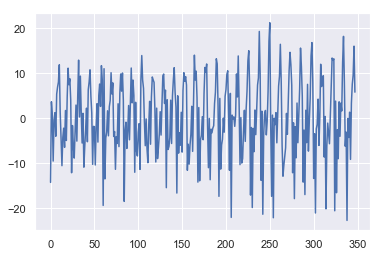

In [18]:
series = pd.Series(dfE) 
X = series.values[::-1]
diff1 = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff1.append(value)
plt.plot(diff1)
plt.show()

<Figure size 720x720 with 0 Axes>

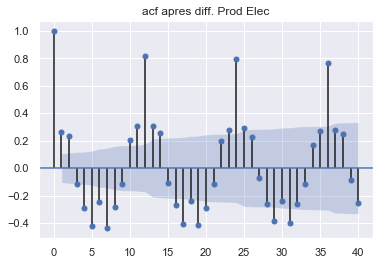

In [19]:
plt.figure(figsize=(10,10))
plot_acf(diff1, lags=40, title="acf apres diff. Prod Elec")
plt.show()

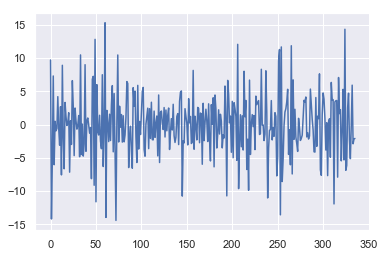

In [20]:
diff2 = list()
for i in range(12, len(diff1)):
    value = diff1[i] - diff1[i - 12]
    diff2.append(value)
plt.plot(diff2)
plt.show()

<Figure size 720x720 with 0 Axes>

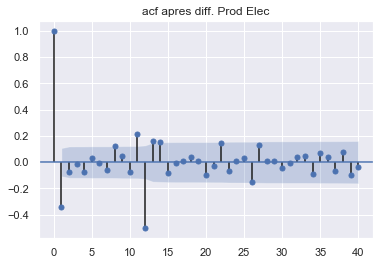

In [21]:
plt.figure(figsize=(10,10))
plot_acf(diff2, lags=40, title="acf apres diff. Prod Elec")
plt.show()

## Test de racine unitaire

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
result = adfuller(dfE, regression='nc')
print('ADF Statistic for elec prod without modification : %f' % result[0])
print('p-value for elec prod  %f' % result[1])

ADF Statistic for elec prod : -1.840739
p-value for elec prod  0.062520


In [27]:
result = adfuller(diff, regression='nc')
print('ADF Statistic for elec prod without seasonality : %f' % result[0])
print('p-value for elec prod  %f' % result[1])

ADF Statistic for elec prod without seasonality : -5.421217
p-value for elec prod  0.000000


In [28]:
result = adfuller(diff2, regression='nc')
print('ADF Statistic for elec prod without seasonality and tred : %f' % result[0])
print('p-value for elec prod  %f' % result[1])

ADF Statistic for elec prod without seasonality and tred : -7.497210
p-value for elec prod  0.000000
